<h1 <font color ='black' style = "font-family: Roboto Medium" class = "emphasized" ><center>Spotify and Youtube Exploratory Data Analysis </center></font></h1>

<center> 
<table>
	<tr> 
		<td><img src="..\SongsStatistics\Images\Spotify_logo.png" width="300" height="100" style="padding-right:40px;"></td>
		<td><img src="..\SongsStatistics\Images\Youtube_logo.png" width="230" height="100"></td> 
	</tr> 
</table>
</center>

<h2 style="font-size: 20px;" style="margin-top: 0px;">Statistics for the Top 10 songs of various Spotify artists and their Youtube videos</h2>


**Dataset title:** Spotify and Youtube

**Link:** https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

**Source:** Kaggle.com (Spotify and Youtube APIs)

**Authors:** Marco Guarisco, Marco Sallustio, Salvatore Rastelli & Regueira Romero, Victor Alejandro

**Temporal coverage:** 02/06/2023 - 02/06/2023


### Installing libraries

In [224]:
# pip install seaborn
# pip install nltk
# pip install wordcloud
# pip install imageio

In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import imageio.v3 as iio

### Dataset manipulation

In [226]:
# Import the csv file and assign the index column.
dataset = pd.read_csv("Spotify_Youtube.csv", index_col='Unnamed: 0')
dataset.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [227]:
music_df = dataset.copy()
music_df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [228]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

Determine the columns that will be useful for the analysis

In [229]:
music_df.isnull().sum().sort_values(ascending=False)

Description         876
Stream              576
Comments            569
Likes               541
official_video      470
Licensed            470
Views               470
Channel             470
Title               470
Url_youtube         470
Valence               2
Duration_ms           2
Tempo                 2
Liveness              2
Instrumentalness      2
Acousticness          2
Speechiness           2
Loudness              2
Key                   2
Energy                2
Danceability          2
Url_spotify           0
Uri                   0
Album_type            0
Album                 0
Track                 0
Artist                0
dtype: int64

* The columns **Url_youtube, Licensed, Channel** are not neccesary for our analysis.

In [230]:
unused = ['Url_youtube', 'Licensed', 'Channel','Url_spotify', 'Uri', 'Url_youtube', 'Title']
music_df.drop(columns = unused, inplace=True)

In [231]:
music_df.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes',
       'Comments', 'Description', 'official_video', 'Stream'],
      dtype='object')

* As the variables **Stream (Spotify reproductions), Views (YouTube reproductions)** are crutial for the analysis, those observation with NAs in these elements will deleted from the dataset.

In [232]:
music_df = music_df.dropna(subset=['Stream','Views','Likes'])
music_df.isnull().sum().sort_values(ascending=False)

Description         391
Comments             75
Instrumentalness      1
Danceability          1
Energy                1
Key                   1
Loudness              1
Speechiness           1
Acousticness          1
Liveness              1
Valence               1
Tempo                 1
Duration_ms           1
Likes                 0
official_video        0
Artist                0
Views                 0
Track                 0
Album_type            0
Album                 0
Stream                0
dtype: int64

In [233]:
# Group the songs by artist and sum its total reproductions
artist_reprod = music_df.groupby('Artist')[['Views', 'Stream']].sum()

# Create a new column with the total of reproductions
artist_reprod['Total'] = artist_reprod['Stream'] + artist_reprod['Views']

# Sort the artists by the sum of views and streams
artist_sorted = artist_reprod.sort_values(['Total'], ascending=False)

top_10 = artist_sorted.head(10)

# top_10.reset_index(inplace=True)
top_10

,Views,Stream,Total
Artist,,,
Ed Sheeran,1.546021e+10,1.439488e+10,2.985509e+10
Justin Bieber,1.099106e+10,1.209777e+10,2.308883e+10
Coldplay,9.997278e+09,1.177848e+10,2.177576e+10
Post Malone,6.394420e+09,1.525126e+10,2.164568e+10
Dua Lipa,8.216339e+09,1.340808e+10,2.162442e+10
Bruno Mars,1.024092e+10,1.089786e+10,2.113878e+10
Imagine Dragons,9.093785e+09,1.185831e+10,2.095210e+10
The Weeknd,7.046033e+09,1.303197e+10,2.007801e+10
Katy Perry,1.312063e+10,6.607329e+09,1.972796e+10


In [234]:
# Defining colors
spotify_color = '#1DB954'
youtube_color = '#b2071d'

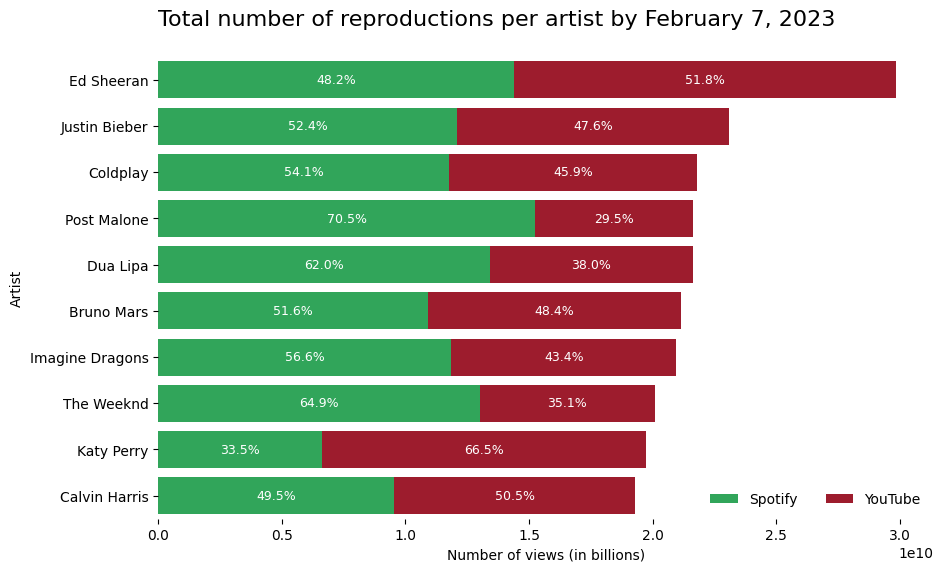

In [342]:
# calculate the percentage of each color within the total bar
spotify_pct = top_10['Stream'] / top_10['Total']
youtube_pct = top_10['Views'] / top_10['Total']

# plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10,6))
spotify_bar = sns.barplot(x="Stream", y=top_10.index, data=top_10, color=spotify_color, label="Spotify")
youtube_bar = sns.barplot(x="Views", y=top_10.index, data=top_10, color=youtube_color, label="YouTube", left=top_10['Stream'])

# add percentage labels to bars
for i, (spotify_val, youtube_val) in enumerate(zip(top_10['Stream'], top_10['Views'])):
    total_val = spotify_val + youtube_val
    spotify_pct_val = spotify_pct[i]
    youtube_pct_val = youtube_pct[i]
    ax.text(spotify_val/2, i, f'{spotify_pct_val:.1%}', ha='center', va='center', color='white', fontsize=9)
    ax.text(spotify_val + youtube_val/2, i, f'{youtube_pct_val:.1%}', ha='center', va='center', color='white', fontsize=9)

ax.set(xlabel="Number of views (in billions)", ylabel="Artist")   
ax.legend(ncol=2, loc="lower right", frameon=False)
ax.set_title('Total number of reproductions per artist by February 7, 2023', loc="left", fontsize=16, y=1.05)

sns.despine(left=True, bottom=True)

plt.show()

### Word Cloud

In [236]:
import nltk

In [345]:
# Group the songs their total reproductions
top_songs = music_df

# Create a new column with the total of reproductions
top_songs['Total'] = top_songs['Stream'] + top_songs['Views']

# Sort the tracks by the sum of views and streams
top_songs_sorted = top_songs.sort_values(['Total'], ascending=False)

top_100_songs = top_songs_sorted.head(100)

top_100_songs.reset_index(inplace=True)
top_100_songs

,index,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,...,Valence,Tempo,Duration_ms,Views,Likes,Comments,Description,official_video,Stream,Total
0,1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,...,0.839,177.928,229360.0,8.079649e+09,50788652.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,1.506598e+09,9.586248e+09
1,365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,...,0.839,177.928,229360.0,8.079647e+09,50788626.0,4252791.0,“Despacito” disponible ya en todas las platafo...,True,1.506598e+09,9.586245e+09
2,12452,Ed Sheeran,Shape of You,÷ (Deluxe),album,0.825,0.652,1.0,-3.183,0.0802,...,0.931,95.977,233713.0,5.908398e+09,31047780.0,1130327.0,The official music video for Ed Sheeran - Shap...,True,3.362005e+09,9.270404e+09
3,14580,Charlie Puth,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,...,0.283,80.025,229526.0,5.773798e+09,40147674.0,2127346.0,Download the new Furious 7 Soundtrack Deluxe V...,True,1.521255e+09,7.295053e+09
4,12469,Wiz Khalifa,See You Again (feat. Charlie Puth),See You Again (feat. Charlie Puth),single,0.689,0.481,10.0,-7.503,0.0815,...,0.283,80.025,229526.0,5.773797e+09,40147618.0,2127345.0,Download the new Furious 7 Soundtrack Deluxe V...,True,1.521255e+09,7.295052e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19623,The Kid LAROI,STAY (with Justin Bieber),F*CK LOVE 3+: OVER YOU,album,0.591,0.764,1.0,-5.484,0.0483,...,0.478,169.928,141806.0,6.812114e+08,10131493.0,247007.0,Official video for “Stay” by The Kid LAROI & J...,True,2.365778e+09,3.046989e+09
96,14069,Justin Bieber,STAY (with Justin Bieber),F*CK LOVE 3+: OVER YOU,album,0.591,0.764,1.0,-5.484,0.0483,...,0.478,169.928,141806.0,6.812056e+08,10131328.0,247007.0,Official video for “Stay” by The Kid LAROI & J...,True,2.365778e+09,3.046983e+09
97,19230,Jhayco,No Me Conoce - Remix,Famouz,album,0.804,0.787,10.0,-3.824,0.0746,...,0.562,91.974,309120.0,1.979060e+09,5920550.0,107535.0,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",True,1.067736e+09,3.046795e+09
98,13020,J Balvin,No Me Conoce - Remix,Famouz,album,0.804,0.787,10.0,-3.824,0.0746,...,0.562,91.974,309120.0,1.979058e+09,5920531.0,107534.0,"Jhay Cortez, J. Balvin, Bad Bunny - No Me Cono...",True,1.067736e+09,3.046794e+09


In [360]:
top_100_songs.iloc[0]

index                                                            1147
Artist                                                     Luis Fonsi
Track                                                       Despacito
Album                                                            VIDA
Album_type                                                      album
Danceability                                                    0.655
Energy                                                          0.797
Key                                                               2.0
Loudness                                                       -4.787
Speechiness                                                     0.153
Acousticness                                                    0.198
Instrumentalness                                                  0.0
Liveness                                                        0.067
Valence                                                         0.839
Tempo               

In [366]:
((((9586247629*4)/60)/24)/365)

72954.70037290716

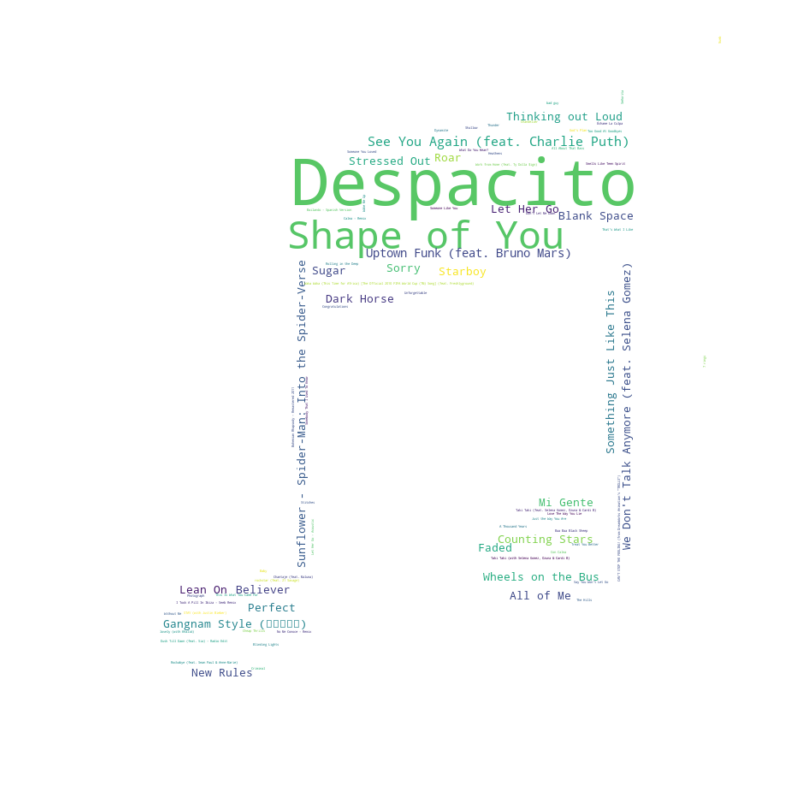

In [369]:
fig, ax = plt.subplots(figsize=(12,10)) #
# Dictionary with track and total reproductions

songs_dict = {}
for i in range(len(top_100_songs)):
    songs_dict[top_100_songs["Track"][i]] = top_100_songs["Total"][i]


music_mask = iio.imread('..\SongsStatistics\Images\music.png')

# Wordcloud with size of tracks depending on their total reproductions
wc = WordCloud(background_color='white',
                mask=music_mask,
                min_font_size=1,
                max_font_size=101,
                colormap="viridis",
                margin=1,
                random_state=42).generate_from_frequencies(songs_dict)

# plot
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

We can see a *strong* relationship between Loudness and Energy

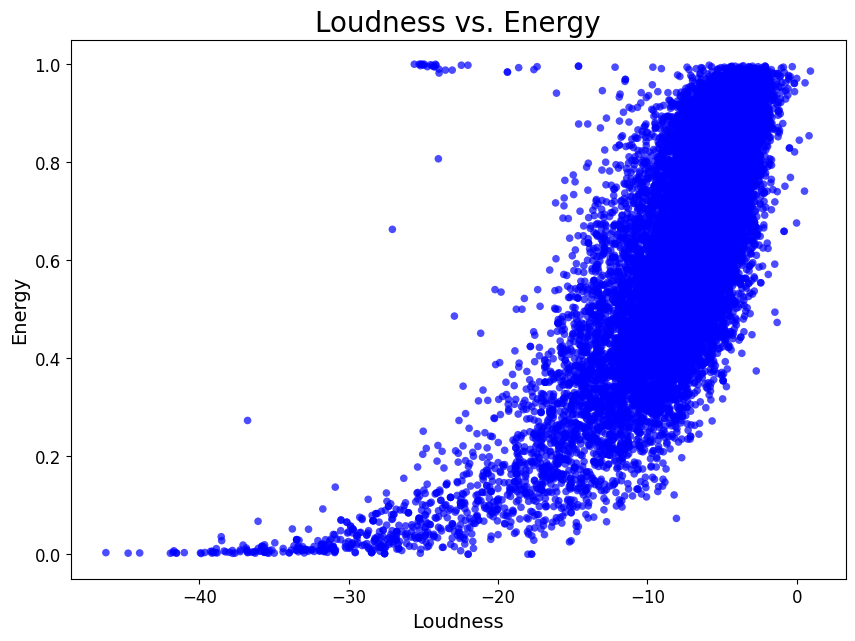

In [239]:
plt.figure(figsize=(10,7))
plt.scatter(music_df['Loudness'], music_df['Energy'], s=30, c='blue', alpha=0.7, edgecolors='none')
plt.title('Loudness vs. Energy', fontsize=20)
plt.xlabel('Loudness', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

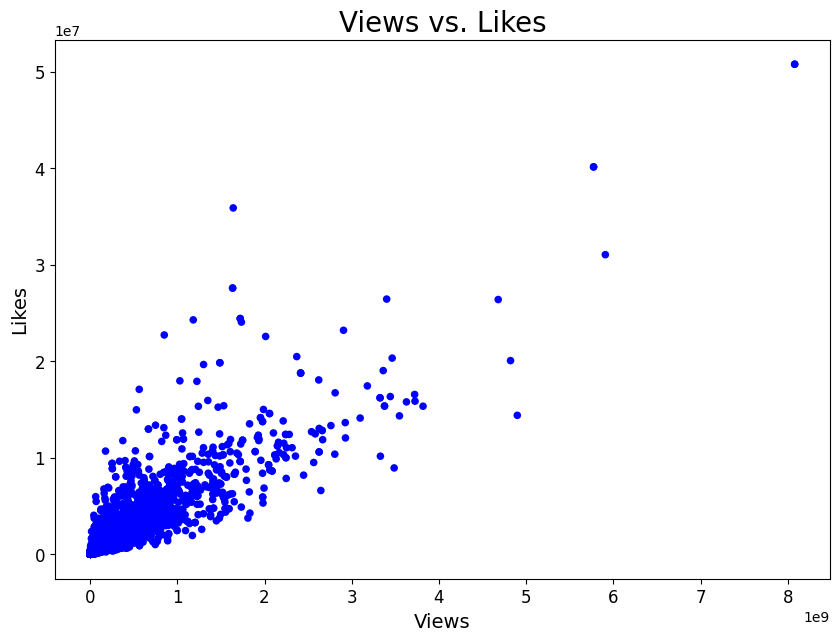

In [240]:
plt.figure(figsize=(10,7))
plt.scatter(music_df['Views'], music_df['Likes'], s=30, c='blue', edgecolors='none')
plt.title('Views vs. Likes', fontsize=20)
plt.xlabel('Views', fontsize=14)dd
plt.ylabel('Likes', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.show()

In general, it is no possible to identify a strong correlation in the most relevant variables. **Our heatmap suggests that none of the variables** as Danceability, Energy, Key, Acousticness or Tempo **has a significant influence in the popularity of a song**.

C:\Users\win7\AppData\Local\Temp\ipykernel_10724\4085098231.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = music_df.corr()


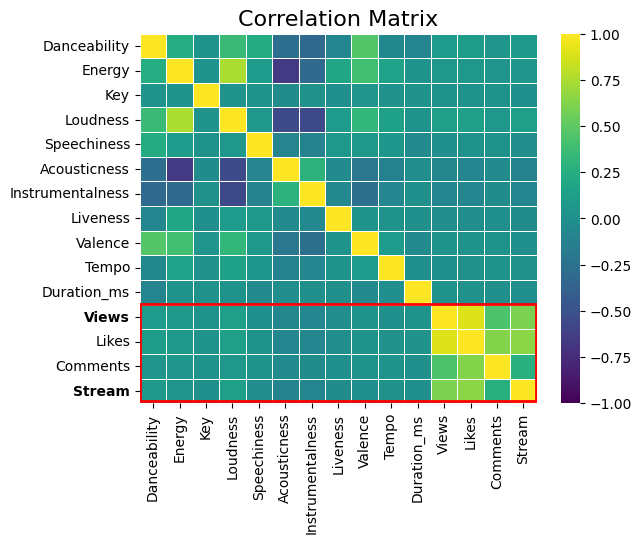

In [242]:
fig, ax = plt.subplots()
corr_matrix = music_df.corr()

# No values
ax = sns.heatmap(corr_matrix, annot=False, linewidth=0.5, cmap="viridis", vmin=-1, vmax=1)
# With values 
# ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap="viridis", annot_kws={"fontsize":6}, vmin=-1, vmax=1)

# Create a Rectangle patch
rect = patches.Rectangle((0,10.99), 14.993, 3.92, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

# Adding bold just to the most important variables
labels = ax.get_yticklabels()

for label in labels:
    label.set_weight('normal')

labels[11].set_weight('bold')
labels[14].set_weight('bold')

ax.set_title("Correlation Matrix", fontsize=16)

plt.show()